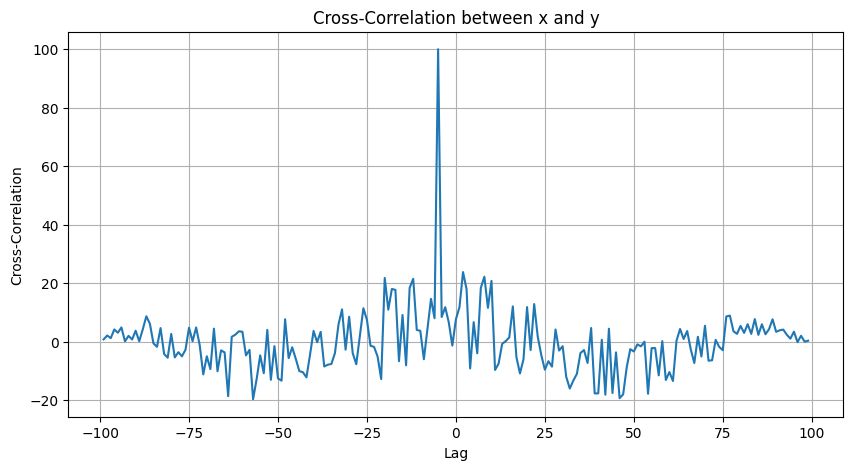

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two signals
x = np.random.randn(100)
y = np.roll(x, 5) + np.random.randn(100) * 0.1  # Shift x by 5 and add noise

# Compute cross-correlation
correlation = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
lags = np.arange(-len(x) + 1, len(x))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(lags, correlation)
plt.title('Cross-Correlation between x and y')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

Signal x: [1 2 3 4 5]
Signal h: [2 1 0 1]

Manual Cross-Correlation: [ 1.  2.  4.  8. 12. 10. 13. 10.]
NumPy Cross-Correlation:  [ 1  2  4  8 12 10 13 10]


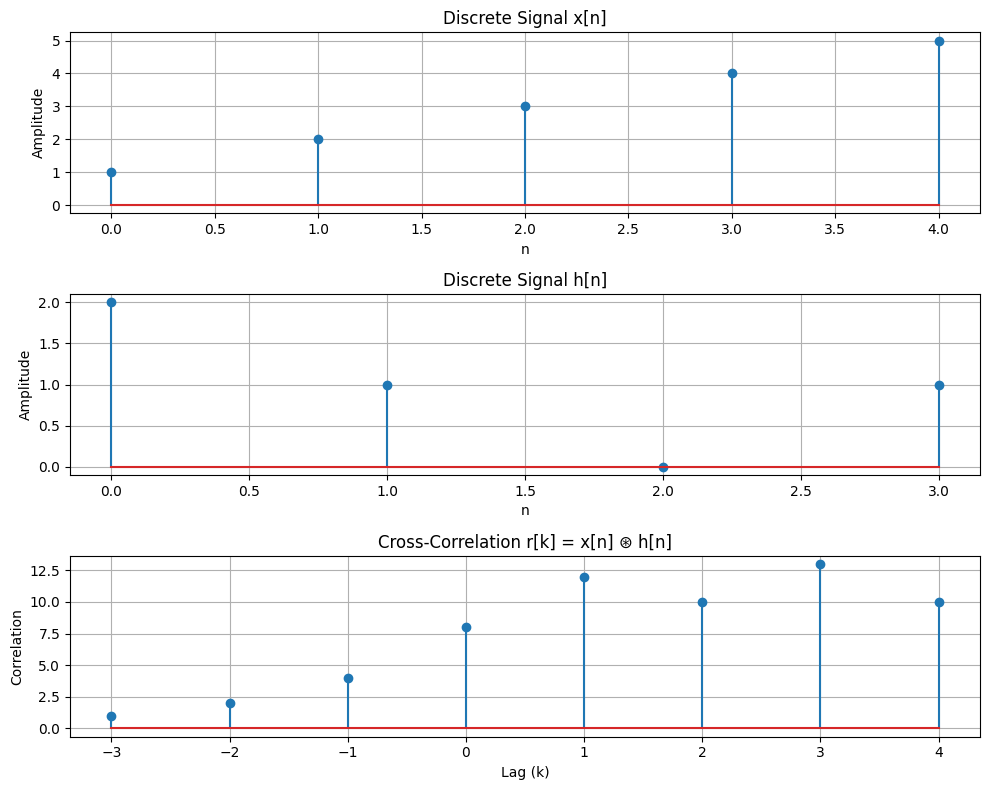

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two discrete signals
x = np.array([1, 2, 3, 4, 5])  # First signal
h = np.array([2, 1, 0, 1])     # Second signal

# Manual Cross-Correlation Implementation
def cross_correlation(x, h):
    """
    Compute cross-correlation of two discrete signals manually.
    Cross-correlation: r[k] = Σ x[n] * h[n + k]
    """
    N = len(x)
    M = len(h)
    result_length = N + M - 1
    correlation = np.zeros(result_length)
    
    # Pad signals with zeros
    x_padded = np.concatenate([np.zeros(M - 1), x, np.zeros(M - 1)])
    
    for k in range(result_length):
        for n in range(M):
            correlation[k] += h[n] * x_padded[k + n]
    
    return correlation

# Compute cross-correlation manually
manual_corr = cross_correlation(x, h)

# Compute using NumPy for verification
numpy_corr = np.correlate(x, h, mode='full')

# Generate lag indices
lags = np.arange(-(len(h) - 1), len(x))

# Display results
print("Signal x:", x)
print("Signal h:", h)
print("\nManual Cross-Correlation:", manual_corr)
print("NumPy Cross-Correlation: ", numpy_corr)

# Plot the signals and cross-correlation
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot signal x
axes[0].stem(range(len(x)), x)
axes[0].set_title('Discrete Signal x[n]')
axes[0].set_xlabel('n')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Plot signal h
axes[1].stem(range(len(h)), h)
axes[1].set_title('Discrete Signal h[n]')
axes[1].set_xlabel('n')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)

# Plot cross-correlation
axes[2].stem(lags, manual_corr)
axes[2].set_title('Cross-Correlation r[k] = x[n] ⊛ h[n]')
axes[2].set_xlabel('Lag (k)')
axes[2].set_ylabel('Correlation')
axes[2].grid(True)

plt.tight_layout()
plt.show()